In [1]:

from google.colab import files
uploaded = files.upload()

Saving data55.xlsx to data55.xlsx


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('data55.xlsx', header = None)             # reading the data
data = data.sample(frac = 1, random_state = 3).reset_index(drop = True)    # shuffling the data
data.head(10)

,0,1,2,3,4
0,5.0,2.3,3.3,1.0,1
1,5.8,2.7,4.1,1.0,1
2,4.6,3.4,1.4,0.3,0
3,5.6,2.9,3.6,1.3,1
4,5.7,2.9,4.2,1.3,1
5,6.0,2.7,5.1,1.6,1
6,5.1,2.5,3.0,1.1,1
7,4.4,3.2,1.3,0.2,0
8,5.0,3.0,1.6,0.2,0
9,5.7,4.4,1.5,0.4,0


In [4]:
## separating input(X) and output(Y)
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]
print("First 5 rows of X")
print(X.head())
print()
print("First 5 rows of Y")
print(Y.head())

First 5 rows of X
     0    1    2    3
0  5.0  2.3  3.3  1.0
1  5.8  2.7  4.1  1.0
2  4.6  3.4  1.4  0.3
3  5.6  2.9  3.6  1.3
4  5.7  2.9  4.2  1.3

First 5 rows of Y
   4
0  1
1  1
2  0
3  1
4  1


In [5]:
### splitting data in train, validation and test set
def split(X, Y, val_split = 0.1, test_split = 0.2):
  '''Arguments:
      X, Y: Input and Output data
      val_split: % of data for validation set
      test_split: % of data for test set
      Returns: train, validation and test set data in the following order - X_train, Y_train, X_val, Y_val, X_test, Y_test
      '''
  train_size = int(len(X) * (1 - (val_split + test_split)))
  val_size = int(len(X) * val_split)
  #test_size = int(len(X) * test_split)
  X_tr = X.iloc[:train_size, :]
  Y_tr = Y.iloc[:train_size, :]
  X_val = X.iloc[train_size:train_size + val_size, :].reset_index(drop = True)
  Y_val = Y.iloc[train_size:train_size + val_size, :].reset_index(drop = True)
  X_ts = X.iloc[train_size + val_size:, :].reset_index(drop = True)
  Y_ts = Y.iloc[train_size + val_size:, :].reset_index(drop = True)

  return X_tr, Y_tr, X_val, Y_val, X_ts, Y_ts

In [6]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = split(X, Y, val_split = 0.1, test_split = 0.2)
print("X_train shape is: ", X_train.shape)
print("Y_train shape is: ", Y_train.shape)
print("X_val shape is: ", X_val.shape)
print("Y_val shape is: ", Y_val.shape)
print("X_test shape is: ", X_test.shape)
print("Y_test shape is: ", Y_test.shape)

X_train shape is:  (70, 4)
Y_train shape is:  (70, 1)
X_val shape is:  (10, 4)
Y_val shape is:  (10, 1)
X_test shape is:  (20, 4)
Y_test shape is:  (20, 1)


In [8]:
min_X = list(X_train.min(axis = 0))  ## min values of features of X_train
max_X = list(X_train.max(axis = 0))  ## max values of features of X_train

In [20]:
def normalize(data, train_data):
  '''
  data: data that is to be normalized
  train_data: normalize the data using training_data features
  Func returns normalized data
  '''
  norm_data = (data - train_data.mean(axis = 0))/train_data.std(axis = 0)
  return norm_data

In [10]:
def sigmoid(z):
  '''
  return sigmoid of z
  '''
  a = 1/(1 + np.exp(-z))
  return a

In [46]:
def compute_cost(A, Y):
  '''
  A: Activation matrix of shape(m,1)
  Y: Output label of shape(m,1)
  returns cost
  '''
  m = A.shape[0]
  cost_mat = -1 * (np.multiply(Y, np.log(A)) + np.multiply((1-Y), np.log(1-A)))
  cost = 1/m * cost_mat.sum(axis = 0)
  return float(cost)

In [22]:
def update_param(X, Y, w, b, learning_rate = 0.01):
  '''
  X and Y: input data and labels
  w: weight matrix of shape(num_features, 1)
  b: bias value
  returns updated weight matrix and cost 
  '''
  m = X.shape[0]
  Z = np.dot(X, w) + b                  ## Z = XW + b
  A = sigmoid(Z)                        ## Activation matrix
  cost = compute_cost(A, Y)             ## computing the cost
  dZ = A - Y                            ## derivative of cost wrt Z
  dW = 1/m * np.dot(X.T, dZ)            ## backprop (weights)
  db = 1/m * np.sum(dZ, axis = 0)       ## backprop (bias)
  w = w - learning_rate * dW            ## updating the parameter

  return w, b, cost

In [50]:
def plot_cost_vs_epochs(cost_l, epochs):
  '''
  cost_list: it has cost after every epoch
  epochs: number of iterations for training
  plots cost plot
  '''
  epoch_list = list(range(epochs))
  plt.plot(epoch_list, cost_l)
  plt.title('cost vs iterations')
  plt.xlabel('epochs')
  plt.ylabel('cost')
  plt.show()

In [52]:
def perceptron(X, Y, learning_rate = 0.01, epochs = 1000):
  '''
  X and Y: input data and labels
  learning_rate: learning_rate of model
  epochs: number of iterations
  returns: final weights and bias and cost_list
  '''
  m = X.shape[0]                ## number of training examples
  n = X.shape[1]                ## number of features
  norm_X = normalize(X, X)      ## normalize the data
  np.random.seed(3)             ## seed to initialize weights with same value 
  w = np.random.randn(n, 1)     ## initialize w of shape(num_features, 1)
  b = 0                         ## initialize b to 0
  cost_list = []                ## to store cost every epoch

  for i in range(epochs):       ## start learning
    w, b, cost = update_param(norm_X, Y, w, b, learning_rate = 0.01)
    cost_list.append(cost)

  plot_cost_vs_epochs(cost_list, epochs)          ## plotting cost vs epoch
  return w, b

In [14]:
def predict(test_data, weights_final, bias_final):
  '''
  test_data: data for which we have to predict labels
  weights_final and bias_final: weights obtained after learning
  returns: predicted labels
  '''
  test_norm = normalize(test_data, X_train)
  Z = np.dot(test_norm, weights_final) + bias_final
  A = sigmoid(Z)
  Y_pred = (A >= 0.5).astype(int)
  return Y_pred

In [15]:
def confusion_matrix(Y, Y_pred):
  '''
  Y: actual labels
  Y_pred: predicted labels
  returns confusion_matrix
  '''
  df_compare = Y.copy()
  df_compare[1] = Y_pred
  df_compare.columns = ['Actual', 'Predicted']
  conf_mat = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames = ['Actual'], colnames = ['Predicted'])
  return conf_mat

In [59]:
def performance_measure(confusion_matrix):
  '''
  returns accuracy, specificity and sensitivity
  '''
  accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1])/(np.sum(np.sum(confusion_matrix)))
  specificity = (confusion_matrix[0][0])/(np.sum(confusion_matrix[0]))
  sensitivity = (confusion_matrix[1][1])/(np.sum(confusion_matrix[1]))
  return accuracy, specificity, sensitivity

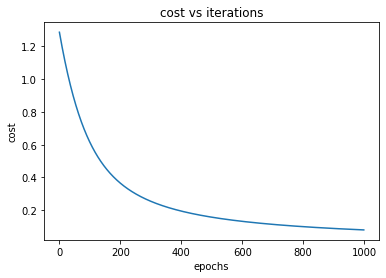

In [60]:
weights_f, bias_f = perceptron(X_train, Y_train, learning_rate=0.01, epochs=1000)

In [61]:
Y_predict = predict(X_val, weights_f, bias_f)
confusion_mat = confusion_matrix(Y_val, Y_predict)
print("confusion matrix for validation  set is: ")
confusion_mat

confusion matrix for validation  set is: 


Predicted,0,1
Actual,,
0,4,0
1,0,6


In [62]:
acc_val, speci_val, sensi_val = performance_measure(confusion_mat)
print("Accuracy is: %f" %(acc_val*100)+' %')
print("Specificity is: %f" %(speci_val*100)+' %')
print("Sensitivity is: %f" %(sensi_val*100)+' %')

Accuracy is: 100.000000 %
Specificity is: 100.000000 %
Sensitivity is: 100.000000 %


In [64]:
Y_predict_test = predict(X_test, weights_f, bias_f)
confusion_mat_test = confusion_matrix(Y_test, Y_predict_test)
print("confusion matrix for test  set is: ")
confusion_mat_test

confusion matrix for test  set is: 


Predicted,0,1
Actual,,
0,14,0
1,0,6


In [65]:
acc_test, speci_test, sensi_test = performance_measure(confusion_mat_test)
print("Accuracy is: %f" %(acc_test*100)+' %')
print("Specificity is: %f" %(speci_test*100)+' %')
print("Sensitivity is: %f" %(sensi_test*100)+' %')

Accuracy is: 100.000000 %
Specificity is: 100.000000 %
Sensitivity is: 100.000000 %
